# Apartment Sale Listings Research

You have access to data from the Yande service — a database of apartment sale listings in St. Petersburg and neighboring areas spanning several years. The goal is to learn how to determine the market value of real estate properties. Your task is to establish parameters. This will enable the creation of an automated system that can detect anomalies and fraudulent activities.

For each apartment for sale, two types of data are available. The first type is entered by the user, while the second type is automatically obtained based on cartographic data. For example, the distance to the city center, airport, nearest park, and water body.

## Studying data from a file

In [26]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('real_estate_data.csv')
display(data.head())

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


The data merged into a single line instead of being separated into columns. To split the columns, let's pass the `sep='\t'` parameter to the `read_csv()` method.

In [27]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Conclusion
The table consists of 22 columns and 23,699 rows. Each row in the table represents data about an apartment and its sale.

According to the documentation:
- `airports_nearest` — distance to the nearest airport in meters (m)
- `balcony` — number of balconies
- `ceiling_height` — ceiling height in meters (m)
- `cityCenters_nearest` — distance to the city center in meters (m)
- `days_exposition` — number of days the advertisement was active (from publication to withdrawal)
- `first_day_exposition` — publication date
- `floor` — floor
- `floors_total` — total number of floors in the building
- `is_apartment` — apartment (boolean type)
- `kitchen_area` — kitchen area in square meters (m²)
- `last_price` — price at the time of withdrawal from publication
- `living_area` — living area in square meters (m²)
- `locality_name` — locality name
- `open_plan` — open plan (boolean type)
- `parks_around3000` — number of parks within a 3 km radius
- `parks_nearest` — distance to the nearest park (m)
- `ponds_around3000` — number of ponds within a 3 km radius
- `ponds_nearest` — distance to the nearest pond (m)
- `rooms` — number of rooms
- `studio` — studio apartment (boolean type)
- `total_area` — total area of the apartment in square meters (m²)
- `total_images` — number of photos of the apartment in the listing

Only 8 columns have no missing values: `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio`, `open_plan`. In columns such as `is_apartment`, `park_nearest`, `ponds_nearest`, there are the most missing values.

For half of the columns, the data type does not match reality. Columns like `floor_total`, `balcony`, `parks_around300`, `ponds_around3000`, `days_exposition` have a `float64` data type, although by nature, they should strictly be `int64`. Data in columns `airports_nearest`, `cityCenters_nearest`, `park_nearest`, and `ponds_nearest` may be floating-point numbers, but for convenience, it is advisable to change their type from `float64` to `int64`, especially since it will not affect the research results. The column `first_day_exposition` has an `object` type, which does not correspond to reality and should be `datatime64`. Similarly, the data type of the `is_apartment` column contradicts its nature, so it should be changed from `object` to `bool`.

There is a style violation in the column name `cityCenters_nearest`.

To proceed further, these data issues need to be addressed.

## Data Preprocessing

### Header Style
Let's rename the column `'cityCenters_nearest'` to `'city_centers_nearest'`:

In [28]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

First, let's calculate the number of missing values in the table.

In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

First, let's fill in the gaps in the `floor_total` column. The presence of only a few gaps suggests they might be attributed to human error – someone may have simply overlooked filling in this data. We will fill in the gaps using the median value. If the floor level of an apartment is less than this median value, we will assume the total number of floors is equal to the apartment's floor level; otherwise, we will use the median value for the total floors.

In [30]:
median_floors = data['floors_total'].median()

def total_floors(floor):
    return max(floor, median_floors)

mask = data['floors_total'].isna()
data.loc[mask, 'floors_total'] = data.loc[mask, 'floor'].apply(total_floors)

There are many missing values in the `ceiling_height` column, almost 40%. However, since the ceiling height is almost the same in all apartments, we will fill it with the median value.

In [31]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

/var/folders/9c/dh3yhrb55296prf50tbgxdk80000gn/T/ipykernel_10166/2257057855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)


Next, let's fill in the gaps in the `kitchen_area` column, which occur in about 10% of cases. A pattern can be observed: for studios (`studio = True`), there is no kitchen area. On the one hand, this is indeed the case since in a studio, all rooms are combined into one. However, on the other hand, in reality, every apartment has a kitchen. Smaller apartments have smaller kitchens, and larger ones have larger ones. Let's examine the relationship between the kitchen area and the total apartment area.

In [32]:
kitchen_total_ratio = data['kitchen_area'] / data['total_area']
kitchen_total_ratio

0        0.231481
1        0.272277
2        0.148214
3             NaN
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696         NaN
23697    0.303583
23698    0.278638
Length: 23699, dtype: float64

As we can see, the majority of kitchens occupy 0.15-0.2 of the total apartment area. Let's calculate the mean and median to see if our observations are confirmed.

In [33]:
print(f'Mean ratio value: {kitchen_total_ratio.mean()}')
print(f'Median ratio: {kitchen_total_ratio.median()}')

Mean ratio value: 0.1873547387717406
Median ratio: 0.1724137931034483


Let's fill in the gaps in the `kitchen_area` column as `median ratio * total_area`.

In [34]:
data['kitchen_area'].fillna(kitchen_total_ratio.median() * data['total_area'], inplace=True)

/var/folders/9c/dh3yhrb55296prf50tbgxdk80000gn/T/ipykernel_10166/60001091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['kitchen_area'].fillna(kitchen_total_ratio.median() * data['total_area'], inplace=True)


Using the same method, let's fill in the missing values in the `living_area` column:

In [35]:
living_total_ratio_median = (data['living_area'] / data['total_area']).median()
data['living_area'].fillna(living_total_ratio_median * data['total_area'], inplace=True)

/var/folders/9c/dh3yhrb55296prf50tbgxdk80000gn/T/ipykernel_10166/1052818207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['living_area'].fillna(living_total_ratio_median * data['total_area'], inplace=True)


Most likely, the gaps in the `balcony` column have occurred because owners of apartments without balconies simply ignore this field in the form. Therefore, let's fill the `NaN` values with zeros.

In [36]:
data['balcony'].fillna(0, inplace=True)

/var/folders/9c/dh3yhrb55296prf50tbgxdk80000gn/T/ipykernel_10166/4169825907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['balcony'].fillna(0, inplace=True)


In the `is_apartment` column, there are 88% missing values. This is a very high percentage, so it is advisable to clarify information about these artifacts with the developer. Unfortunately, we do not have such an opportunity, so we will make assumptions ourselves. The first thing that comes to mind is that the `is_apartment`, `studio`, and `open_plan` columns are mutually exclusive. Let's check this:

In [37]:
(data['is_apartment'] + data['studio'] + data['open_plan']).value_counts()

0    2703
1      72
Name: count, dtype: int64

Indeed, if at least one of the three parameters is `True`, the other two are `False`. There are 72 such combinations in the table. However, there are also 2703 combinations where all three parameters are false (`is_apartment == False and studio == False and open_plan == False`). So, we can replace the missing values in `is_apartment` with `False` where at least one of the other two parameters (`studio`, `open_plan`) is `True`. However, we cannot replace the missing values with `True` where the other two columns are `False`. Therefore, it makes sense to replace all the missing values in this column with `False`.

In [38]:
data['is_apartment'].fillna(False, inplace=True)

/var/folders/9c/dh3yhrb55296prf50tbgxdk80000gn/T/ipykernel_10166/4221261463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['is_apartment'].fillna(False, inplace=True)
/var/folders/9c/dh3yhrb55296prf50tbgxdk80000gn/T/ipykernel_10166/4221261463.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['i

In the `locality_name` column, there are less than 0.5% missing values. Since we cannot find the names of the localities, we have two options: either delete the rows with missing values or replace the `NaN` values with a placeholder. Let's go with the first option:

In [39]:
data.dropna(subset=['locality_name'], inplace=True)
data.reset_index(drop=True, inplace=True)

The `day_exposition` column informs us about how many days the ad was posted. However, if the ad is still active, `NaN` values are quite normal. Therefore, we won't do anything with the missing values in this column.

There are 20% missing values in the columns `airport_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000`, and 60% missing values in the columns `parks_nearest`, `ponds_nearest`. If we take a closer look at the data, it's noticeable that the gaps in all six parameters occur simultaneously. Most likely, this coincidence occurred because the exact geolocation of the apartment was lost, and the program couldn't automatically calculate these data. However, we still have the name of the locality (`locality_name`) for these apartments. Therefore, we can fill the gaps with the median for each locality group.

Let's see what unique values are in the `locality_name` column:

In [40]:
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

In the column, there are implicit duplicates caused by appending the settlement type name to the name of the settlement itself. For example, <i>посёлок Мурино, поселок Мурино, Мурино</i>. To address this, we will write a function that extracts only the capitalized word (i.e., the actual name) from the locality name strings.

In [41]:
def get_locality_name(locality_name):
    return ' '.join([word for word in locality_name.split() if word[0].istitle()])

data['locality_name_unique'] = data['locality_name'].apply(get_locality_name)
data['locality_name_unique'].value_counts()

locality_name_unique
Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Пельгора               1
Каложицы               1
Платформа              1
Почап                  1
Дзержинского           1
Name: count, Length: 305, dtype: int64

By removing duplicates, we have reduced the number of unique values by almost 20%. Now, we can fill in the gaps in the columns `airport_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000`, `parks_nearest`, `ponds_nearest`.

In [42]:
location_columns = ['airports_nearest', 'city_centers_nearest', 'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']

def get_value(row, column, medians):
    if pd.isna(row[column]):
        return medians.loc[row['locality_name_unique']]
    return row[column]

for col in location_columns:
    medians_data = data.groupby('locality_name_unique')[col].median()
    data[col] = data.apply(lambda row: get_value(row, col, medians_data), axis=1)

data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4829
city_centers_nearest    4829
parks_around3000        4829
parks_nearest           5998
ponds_around3000        4829
ponds_nearest           4938
days_exposition         3180
locality_name_unique       0
dtype: int64

Although some gaps still remain, we have managed to fill in over 600 gaps for each column. It doesn't make sense to fill the remaining gaps with specific data, as it may only distort the overall picture.

### Data Type Conversion

Let's take another look at the data types.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The columns `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` contain `NaN`, which is of type `float`, so we will not change the type in these columns. However, for the columns `last_price`, `total_area`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, let's change the type from `float` to `int`. We will also change the date type to make it more convenient to work with.

In [44]:
float_columns = ['last_price', 'total_area', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'rooms']

for col in float_columns:
    data[col] = data[col].astype('int')

data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  int64         
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  int64         
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  int64         
 13  balcony         

All the necessary data types have been changed.

### Handling Duplicates

Let's check the data for any duplicates.


In [45]:
data.duplicated().sum()

0

There are no duplicates in the data.

## Calculations and Adding Results to the Table

Let's calculate the price per square meter:

In [46]:
data['price_m2'] = (data['last_price'] / data['total_area']).round(2)

Let's find out and add to the table the day of the week, month, and year of the publication of the ad:

In [47]:
data['weekday'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month_name()
data['year'] = data['first_day_exposition'].dt.year

Let's categorize the floor of the apartment - <i>первый, последний, другой</i>.

In [48]:
def get_floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(get_floor_category, axis=1)

Let's calculate the ratio of living area to total area and the ratio of kitchen area to total area.

In [49]:
data['living_total_area_ratio'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_total_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

## Exploratory Data Analysis

Let's analyze the following characteristics: area, price, number of rooms, ceiling height, and the time it takes to sell the apartment by building histograms for each.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

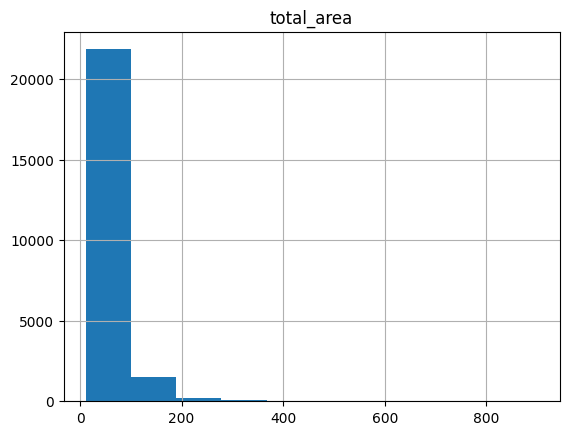

In [50]:
data.hist('total_area')

From the histogram, it's evident that most apartments have an area below 100 m². However, there are apartments with an area reaching 900 m². It's challenging to imagine such apartments in real life, so most likely, these are outliers that distort the diagram. If we limit the plot to more realistic values (from 20 to 200 m²), we can analyze the data more effectively.

count    23650.000000
mean        60.100930
std         35.673519
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

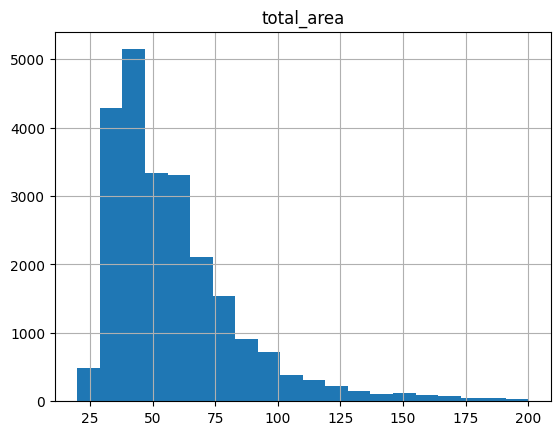

In [51]:
data.hist('total_area', range=(20, 200), bins=20)
data['total_area'].describe()

The histogram has changed: there are more apartments (75%) with an area up to 70 m², and as the area increases, the number of apartments decreases exponentially. There are almost no apartments with an area of 200+ m².

Let's analyze the next column - `last_price`.

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

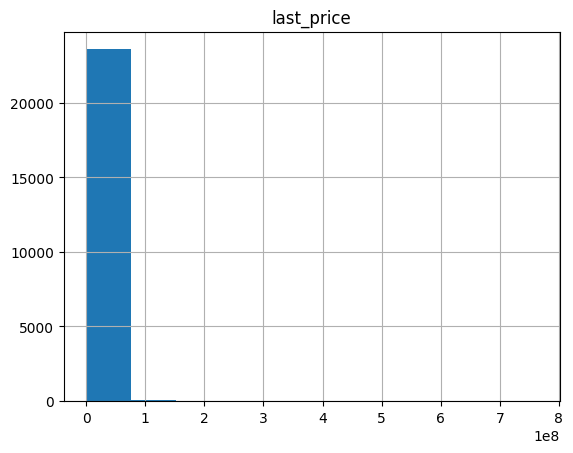

In [52]:
data.hist('last_price')

It's challenging to pinpoint anything specific about this histogram. Most of the data lies within the range from 0 to 60,000,000. All other values seem more like outliers. Therefore, let's analyze the histogram limited to the numbers 0 and 0.6e8, and break it down into 50 bins.

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

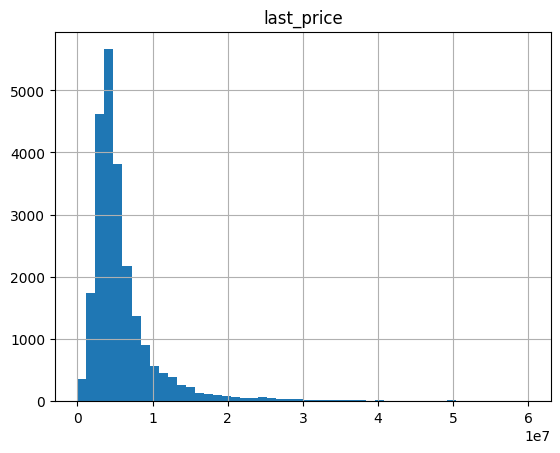

In [53]:
data.hist('last_price', bins=50, range=(0, 0.6e8))
data['last_price'].describe()

The histogram resembles a Poisson distribution. Most of the data falls within the range from 0 to 1e7, with the median at 0.5e7.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

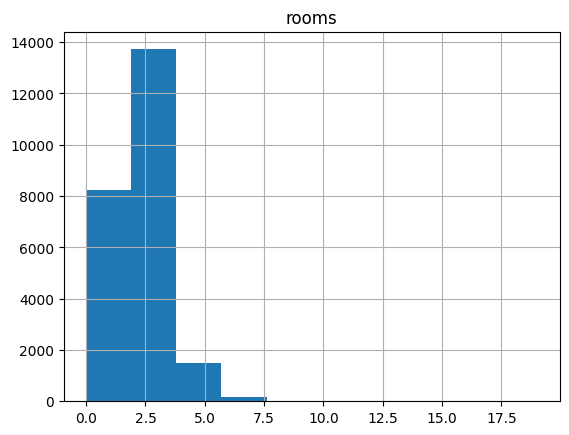

In [54]:
data.hist('rooms')
data['rooms'].describe()

Most apartments have a number of rooms ranging from zero to three, while four- or five-room apartments are rare. The median and mean values are the same and equal to 2.

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

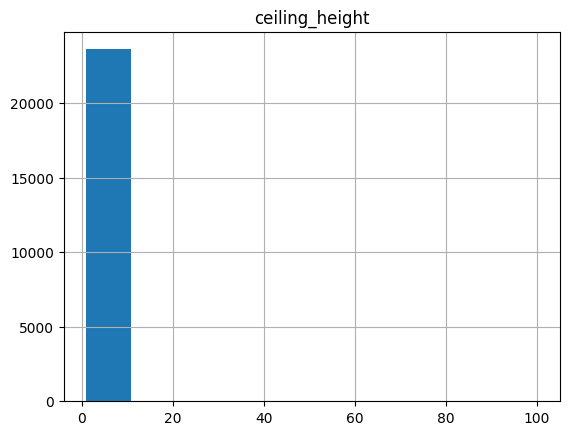

In [55]:
data.hist('ceiling_height')

From this histogram, it's hard to make sense of anything. We need to set a `range` with more realistic ceiling heights.

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

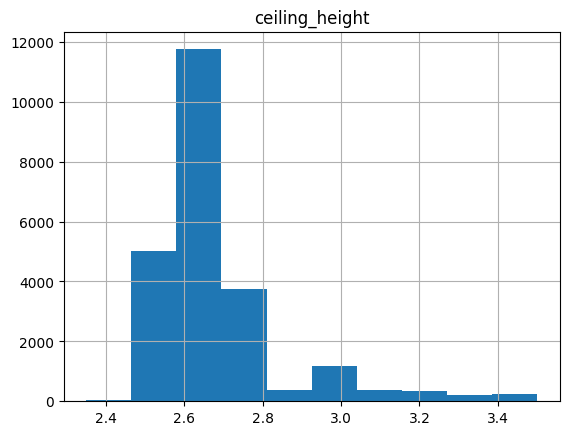

In [56]:
data.hist('ceiling_height', range=(2.35, 3.5))
data['ceiling_height'].describe()

Now we can analyze the plot. 50% of the data falls within the range from 2.6 to 2.7, which is a standard ceiling height in modern apartments. Of course, there are apartments with ceilings higher than 3m, possibly in historical or grand buildings.

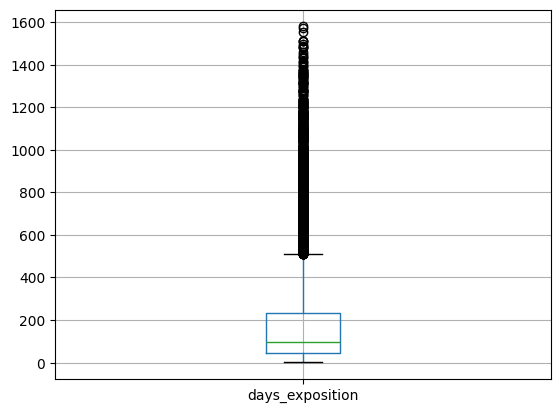

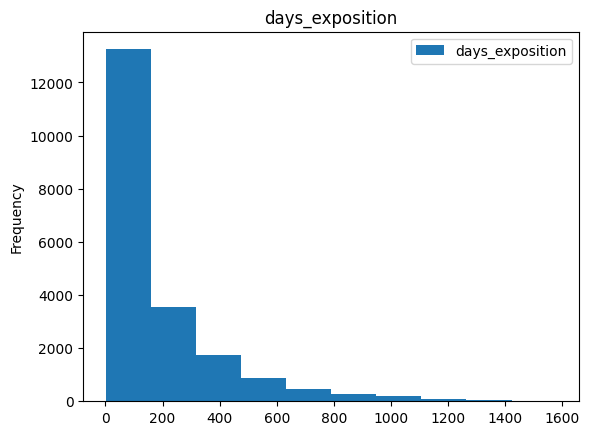

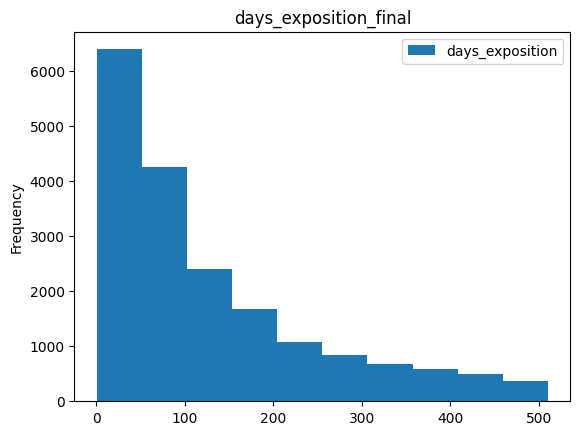

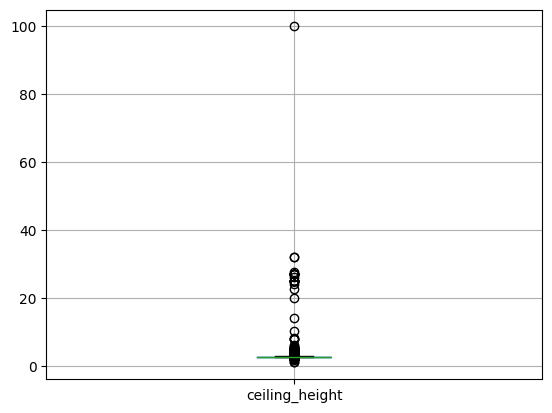

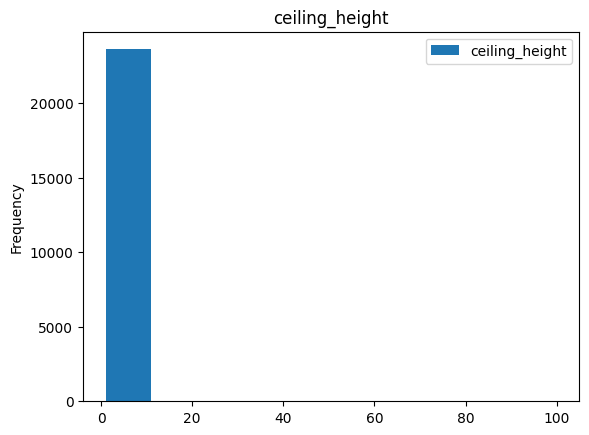

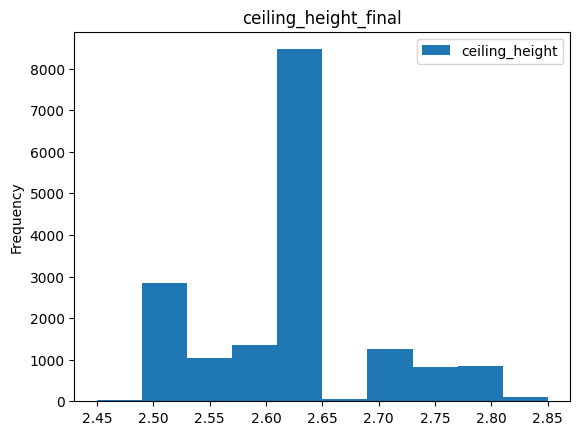

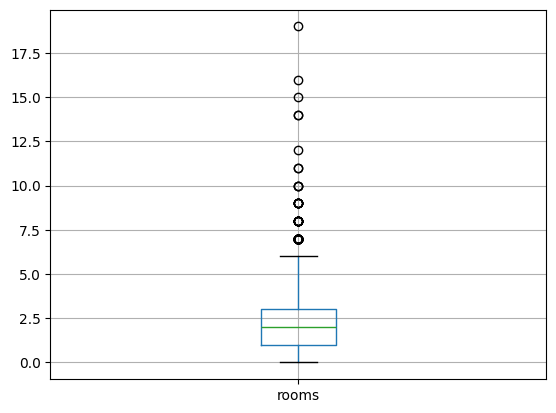

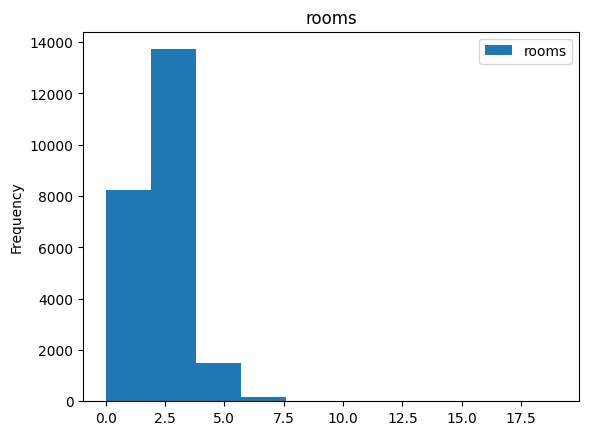

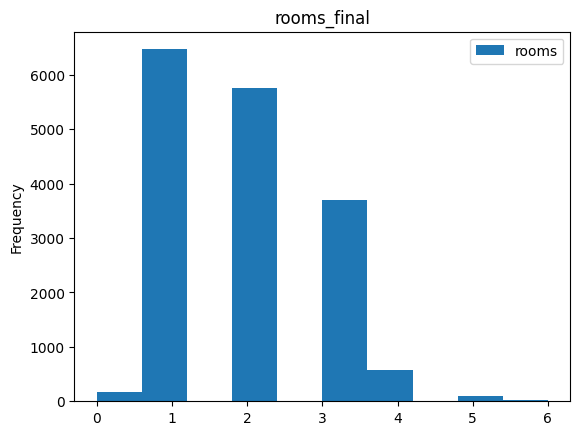

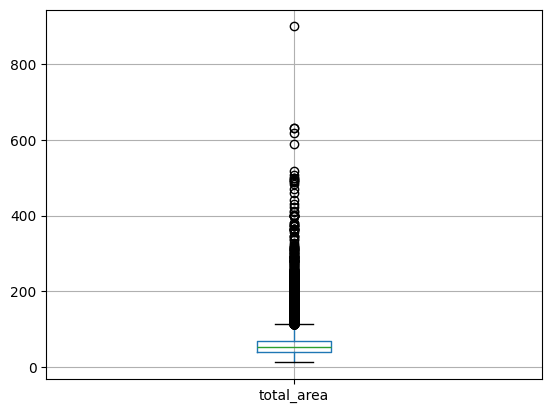

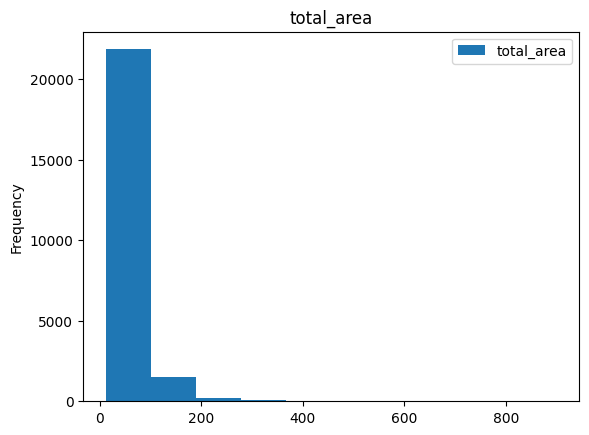

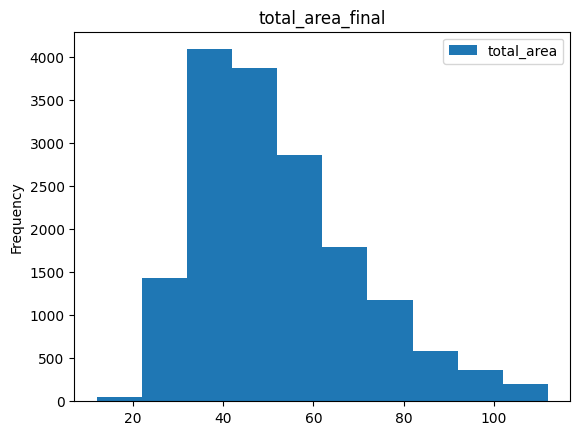

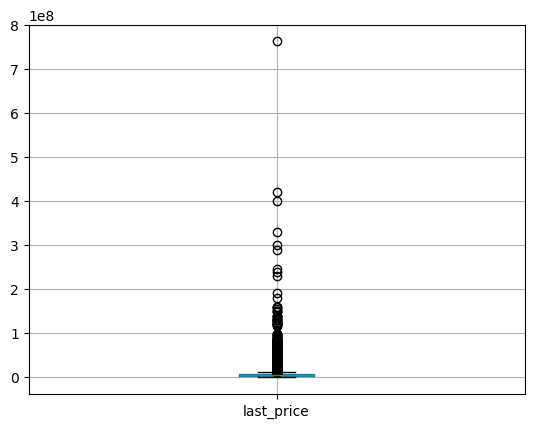

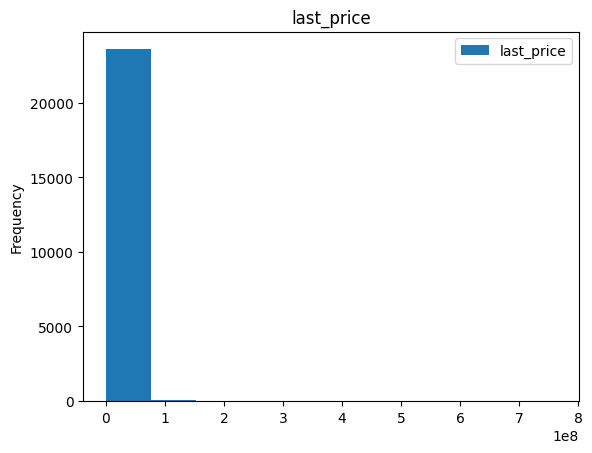

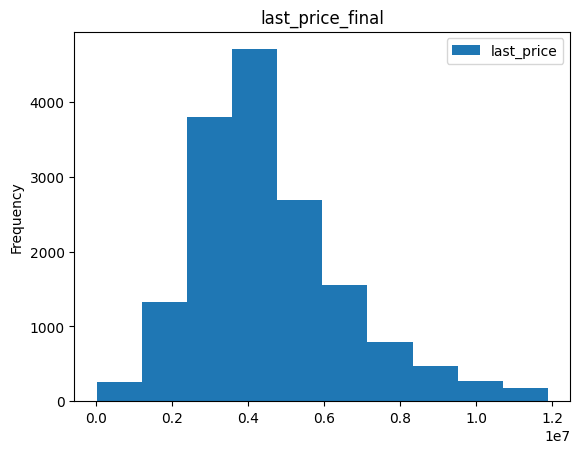

We removed 32.26% of the data.


In [57]:
import matplotlib.pyplot as plt

def get_whiskers(dataset):
    q_1 = dataset.quantile(0.25)
    q_3 = dataset.quantile(0.75)
    iqr = q_3 - q_1
    left_whisker = q_1 - 1.5 * iqr
    right_whisker = q_3 + 1.5 * iqr
    return (
        max(dataset.min(), left_whisker),
        min(dataset.max(), right_whisker)
    )

columns = ['days_exposition', 'ceiling_height', 'rooms', 'total_area', 'last_price']

final_data = data
for col in columns:
    data.boxplot(column=col)
    plt.show()
    l_whisker, r_whisker = get_whiskers(data[col])
    final_data = final_data[(final_data[col] >= l_whisker) & (final_data[col] <= r_whisker)]

    data.plot(y=col, kind='hist', title=f'{col}')
    plt.show()

    final_data.plot(y=col, kind='hist', title=f'{col}_final')
    plt.show()
final_data.reset_index()
print(f'We removed {(1 - final_data.shape[0]/data.shape[0]):.2%} of the data.')

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

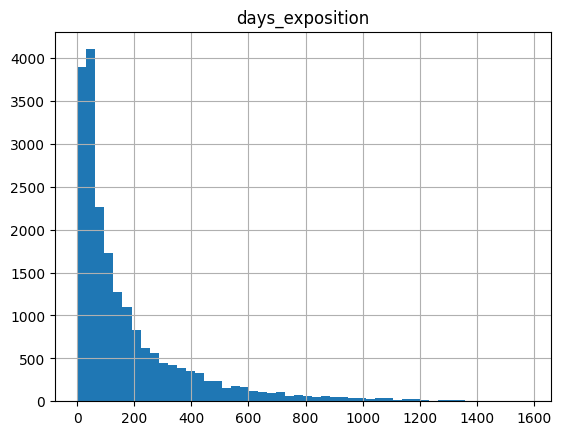

In [58]:
data.hist('days_exposition', bins=50)
data['days_exposition'].describe()

The majority of apartments are sold within the first 100 days after the ad is published. The peak is between 30 and 60 days, after which it sharply declines. The standard deviation is large, and the mean is almost twice the median, indicating outliers that may have resulted from people forgetting to remove listings after selling their apartments.

### Removing Outliers

As we have already learned, our data is cluttered with rare outliers. To prevent them from distorting the overall picture, we should remove them.

Although we reduced the amount of data by a whopping 32%, we have eliminated all outliers: apartments with 18 rooms and ceilings of 100m. Now we can analyze the data and look for patterns.

### Which Factors Most Affect the Apartment Price?

Let's explore whether the price depends on the area, number of rooms, and distance from the city center. We can create pairwise scatter plots for price and area, price and number of rooms, price and distance from the center, and 13 more combinations. Additionally, we can calculate the correlation coefficient for each pair of columns.

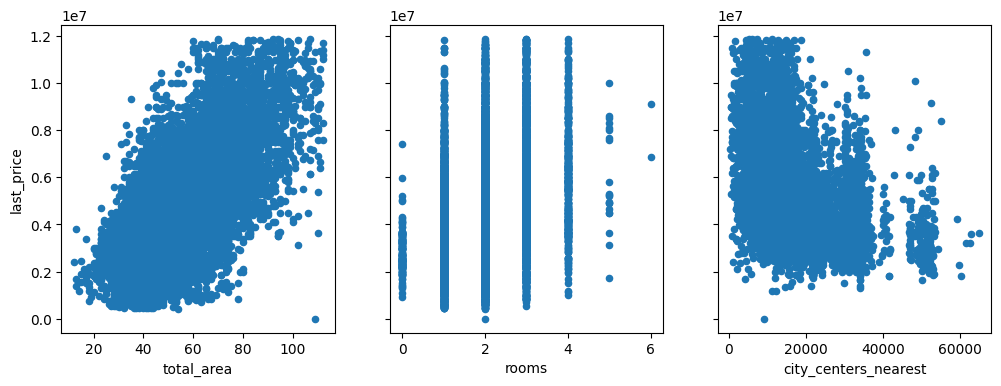

ValueError: could not convert string to float: 'посёлок Шушары'

In [59]:
# let's create a function for future use

def corr_scatter_matrix(data, cols):
    fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(4*len(cols), 4))
    for i, col in enumerate(cols):
        data.plot(kind='scatter', x=col, y='last_price', ax=axes[i], sharey=True)
    plt.show()
    print('Correlation with last_price:',  data.corr().loc[cols, 'last_price'], sep='\n')

corr_scatter_matrix(final_data, ['total_area', 'rooms', 'city_centers_nearest'])

From the scatter plots, it is evident that the apartment price (`last_price`) is dependent on its area (`total_area`), meaning these two variables are correlated. Indeed, if we look at the correlation coefficient, it is 0.68, indicating a moderate correlation.

There is a weak correlation between parameters such as `last_price` and `rooms`. Studios and one-bedroom apartments are generally cheaper, but there isn't a significant price difference among apartments with 2 or more rooms.

A weak negative correlation exists between `last_price` and `city_centers_nearest`. From the scatter plot, we can see that apartments located far from the city center tend to be cheaper. However, it's also noticeable that apartments in the center or close to it can vary widely in price.

Let's check if the price depends on the day of the week, month, or year of the ad publication, as well as the floor category.

In [ ]:
# let's create a function for future use.
def scatter_plots(data, columns):
    for col in columns:
        plt.scatter(data['last_price'], data[col], alpha=0.1)
        plt.show()
        # let's also display the number of unique values and their mean for each column.
        display(data.pivot_table(index=col, values='last_price', aggfunc=['count', 'mean', 'median']))

scatter_plots(final_data, ['floor_category', 'weekday', 'month', 'year'])

Apartments on the first floor are the least expensive. Although the line representing apartments on the ***другом*** floor is denser than the line for apartments on the ***последнем*** floor, it doesn't necessarily mean these apartments are more expensive; it may be due to a larger amount of data. Moreover, the price range for apartments on the ***последнем*** floor corresponds to the price range for apartments on the ***другом*** floor.

The day of the week when the listing is published almost doesn't affect the apartment's price, except that ***понедельник*** has slightly fewer expensive apartments. It's also noticeable that on ***субботу*** and ***воскресенье***, people publish ads less actively.

The most advantageous month for buying an apartment is ***июле***, while the ***осенние месяцы*** might be less attractive for buyers. However, it's challenging to conclude that there is even a moderate correlation between the publication month and the price; it seems more like a weak or nonexistent relationship.

Looking at the scatter plot, one might infer that apartments were the cheapest in ***2015*** and ***2019***, while the most expensive in ***2017*** and ***2018***. However, for ***2015*** and ***2019***, we have less data, so their scatter plots look different. Nevertheless, if we consider the average apartment price over the last three years, we can observe a trend of increasing prices, which is logical considering inflation.

**Conclusion**
We have explored the relationship between the price and various characteristics of apartments. We can assert that there is a correlation between the apartment's area and the price, between the number of rooms and the price, as well as a moderate negative correlation between the price and the distance from the city center. The day and month of publication have no significant impact on the price, while there is a moderate connection with the year of publication.

Now let's select the top 10 localities with the highest number of listings. We will calculate the average price per square meter in these localities and identify the areas with the highest and lowest housing costs.

In [ ]:
(
    final_data.pivot_table(index='locality_name_unique', values='price_m2', aggfunc=['count', 'mean'])
    .sort_values(by=('count', 'price_m2'), ascending=False)
    [0:10]
    .sort_values(by=('mean', 'price_m2'), ascending=False)
)

In Санкт-Петербург, there is the largest number of listings, and it also has the highest price per square meter. In all other localities, the number of listings is at least 20 times less, and the average price per square meter differs by a couple of thousand. The lowest housing cost is in the city of Выборг.

We will investigate apartments in Санкт-Петербурге. To start, let's determine which area is considered the city center.

In [ ]:
data_spb = final_data.query('locality_name_unique == "Санкт-Петербург"').copy()
data_spb['city_centers_nearest_km'] = final_data['city_centers_nearest'] // 1000
(
    data_spb.pivot_table(index='city_centers_nearest_km', values='price_m2', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(14, 6))
)

From the plot, it is evident that the 8 km mark is a turning point. Beyond this distance, the price fluctuates but never exceeds the price at this point, indicating a decline.

Now let's focus on the segment of apartments in the city center and compare some average values with the overall averages for the entire city.

In [ ]:
data_spb_center = data_spb.query('city_centers_nearest_km < 8').copy()

columns = ['floors_total', 'ceiling_height', 'days_exposition', 'total_area', 'price_m2', 'rooms']

(
    pd.DataFrame(data_spb_center[columns].mean()).transpose()
    .append(
        pd.DataFrame(data_spb[columns].mean()).transpose()
    )
)

The city center is characterized by lower buildings compared to the entire city of St. Petersburg. However, the average ceiling height in these buildings is slightly higher. Apartments in the center tend to have larger total and living areas, as well as a higher number of rooms. Additionally, the price per square meter is higher in this area, but the average time for selling these apartments is longer.

If you have any specific questions or if there's anything else you would like to explore in the data, feel free to let me know!

Let's analyze the factors influencing the formation of housing prices and compare the results with the overall city data.

In [ ]:
corr_cols = ['total_area', 'rooms', 'ceiling_height', 'floor', 'city_centers_nearest', 'year']
print('Saint Petersburg:')
corr_scatter_matrix(data_spb, corr_cols)
print('\n')
print('The center of Saint Petersburg:')
corr_scatter_matrix(data_spb_center, corr_cols)

The highest correlation coefficient can be observed between the price and the total area of the apartment; it is slightly higher for the city center.

Since the number of rooms correlates with the total area, the price depends on the number of rooms accordingly.

In the city center, apartments located on higher floors are sold at a higher price; whereas, in the entire city dataset, the floor does not influence the price.

It is logical that for apartments in the center, the distance from the center has almost no effect on the price, but when analyzing the entire city, there is a small negative correlation between the price and the distance from the center.

Throughout the city, apartments with higher ceilings are sold at a higher price (correlation coefficient = 0.27), while for the center, the correlation coefficient is lower at 0.18.

Let's see how the prices of apartments in the center and the entire city change over the years:

In [ ]:
scatter_plots(data_spb, ['year'])
scatter_plots(data_spb_center, ['year'])

Interestingly, the cost of apartments does not change over time, and in the center, it even decreases. Now let's look at how the price per square meter changes.

In [ ]:
for data in [data_spb, data_spb_center]:
    data.plot(x='price_m2', y='year', kind='scatter', alpha=0.5)
    plt.show()
    display(data.pivot_table(index='year', values='price_m2', aggfunc=['mean', 'median']))

The price per square meter is still increasing. Now we can look at how the apartment's area changes. Let's create a pivot table:

In [ ]:
for data in [data_spb, data_spb_center]:
    display(
        data.pivot_table(
            index='year',
            values=['price_m2', 'total_area', 'last_price'],
            aggfunc=['mean']
        )
    )

With time, the average total area of sold apartments tends to decrease, while the price per square meter increases. This explains why the overall apartment price remains almost constant over the years or even decreases.

## Overall Conclusion

We have investigated real estate listings for apartments in St. Petersburg and its surroundings. We found that the following factors have the most significant impact on the apartment price:

- Total area of the apartment (correlation coefficient varies from 0.68 to 0.79 depending on the sample)
- Number of rooms (correlation coefficient ~0.4)
- Distance from the city center (correlation coefficient from -0.12 to -0.32, with an increase in distance from the center, the price decreases)
- Ceiling height (weak correlation in the range of 0.15–0.2)
- The floor has a slight impact, especially in the center of St. Petersburg (correlation coefficient 0.2)

The apartment price is not influenced by the day of the week, month, or year of publication. Although we discovered an interesting pattern that over the years, the total area of the sold apartments decreases, while the price per square meter increases.

In [ ]:
data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
data.hist(bins=[0, 1, 4, 10])